# Option 1: Construct a visualization of the Illinois Building Inventory that communicates the following information: 

1. Relationship between the year acquired and the year constructed. 

2. Total square footage as a function of congressional district ("Congress Dist").

3. Average square footage per floor as a function of congressional district.


In [1]:
# import our usual things
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
# for calcuations
import numpy as np
# use pandas today!
import pandas as pd

In [2]:
# reading in the data
buildings = pd.read_csv('/home/dgorrell/Downloads/building_inventory.csv',
                       na_values={'Square Footage': 0, 
                                 'Year Acquired': 0,
                                 'Year Constructed': 0})
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,432.0,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,330.0,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,NaN,1987.0,130.0,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971.0,1971.0,49552.0,1,1,0,Education,Education,Not provided



Visualizatio 1: Relationship between the year acquired and the year constructed.


In [3]:
stats = buildings.groupby("Year Acquired")["Year Constructed"].describe()
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1753.0,NaN,1753.0,1753.0,1753.0,1753.0,1753.0
1802.0,2.0,1802.0,0.000000,1802.0,1802.0,1802.0,1802.0,1802.0
1810.0,3.0,1810.0,0.000000,1810.0,1810.0,1810.0,1810.0,1810.0
1832.0,1.0,1832.0,NaN,1832.0,1832.0,1832.0,1832.0,1832.0
1837.0,1.0,1837.0,NaN,1837.0,1837.0,1837.0,1837.0,1837.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,2015.0,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
2016.0,10.0,2015.8,0.632456,2014.0,2016.0,2016.0,2016.0,2016.0
2017.0,1.0,2017.0,NaN,2017.0,2017.0,2017.0,2017.0,2017.0


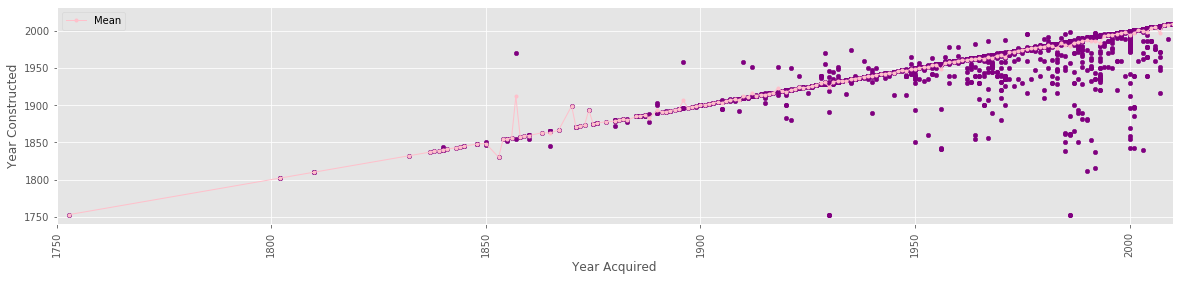

In [44]:
plt.style.use("ggplot")
ax = buildings.plot(x="Year Acquired", y="Year Constructed", color= "purple", figsize=(20,4), rot=90, 
                   kind="scatter")
ax.set_xlim(1750, 2010)
ax.plot(stats['mean'], marker='.', linewidth=1.0, label="Mean", color="pink")
ax.set_xlabel('Year Acquired') 
ax.set_ylabel('Year Constructed')
ax.legend()
plt.show()


Visualizatio 2: Total square footage as a function of congressional district ("Congress Dist").


In [5]:
congress = buildings.groupby("Congress Dist")["Square Footage"].sum()
congress

Congress Dist
0       793124.0
1      2351762.0
2      6285684.0
3      1293687.0
4       317741.0
5      1809022.0
6       145659.0
7      9211651.0
8      1461548.0
9        77978.0
10      929267.0
11     3467894.0
12    12444775.0
13    31849251.0
14      857108.0
15     7209934.0
16     8725880.0
17     4347743.0
18     8120838.0
Name: Square Footage, dtype: float64

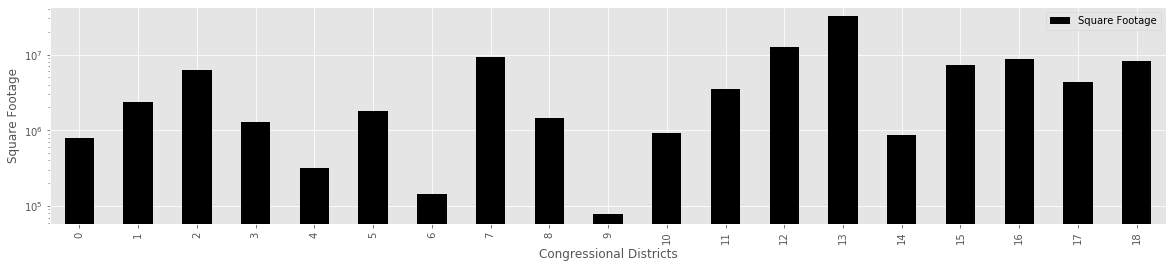

In [54]:
plt.style.use("ggplot")
ax = congress.plot(x="Congress Dist", y="Square Footage", color= "Black", figsize=(20,4), rot=90, 
                   kind="bar")
ax.set_xlabel('Congressional Districts') 
ax.set_ylabel('Square Footage')
ax.set_yscale('log')
ax.legend()
plt.show()


Visualizatio 3: Average square footage per floor as a function of congressional district.


In [50]:
illinois = buildings.groupby("Congress Dist")["Square Footage"].describe()
illinois

,count,mean,std,min,25%,50%,75%,max
Congress Dist,,,,,,,,
0,163.0,4865.791411,7600.145257,16.0,1350.00,2800.0,3228.00,54600.0
1,44.0,53449.136364,65616.033779,25.0,6088.00,28750.0,71719.00,299772.0
2,313.0,20082.057508,54522.949166,40.0,966.00,2970.0,18683.00,460546.0
3,36.0,35935.750000,96998.397696,24.0,300.00,5942.0,14905.00,500000.0
4,11.0,28885.545455,67101.974687,154.0,990.00,5040.0,9365.00,224959.0
5,46.0,39326.565217,44474.077144,25.0,11199.00,23800.0,40838.00,185525.0
6,26.0,5602.269231,8296.368577,100.0,1406.25,1704.0,4295.00,31951.0
7,110.0,83742.281818,165110.132022,25.0,3932.75,15630.0,99109.25,1200000.0
8,107.0,13659.327103,27856.582826,25.0,572.00,2056.0,14432.00,150000.0


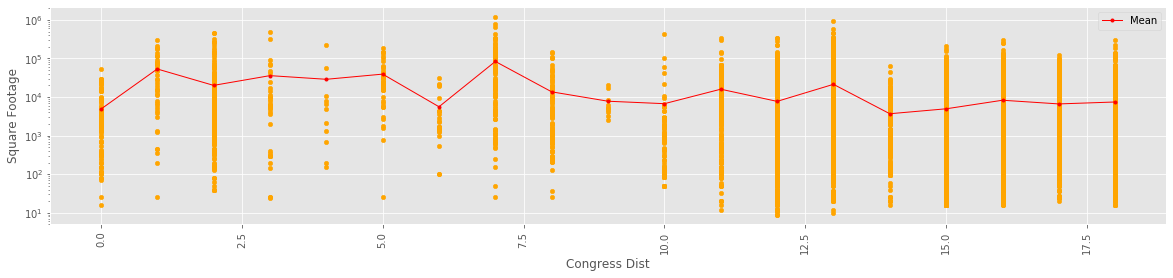

In [59]:
ax = buildings.plot(x="Congress Dist", y="Square Footage", color= "orange", figsize=(20,4), rot=90, 
                   kind="scatter")
ax.plot(illinois['mean'], marker='.', linewidth=1.0, label="Mean", color="red")
ax.set_xlabel('Congress Dist')
ax.set_ylabel('Square Footage')
ax.set_yscale('log')
ax.legend()
plt.show()